# Montar drive e instalación de librerias

In [3]:
!pip install rasterio
!pip install spectral


#Visualización de imagén .TIF

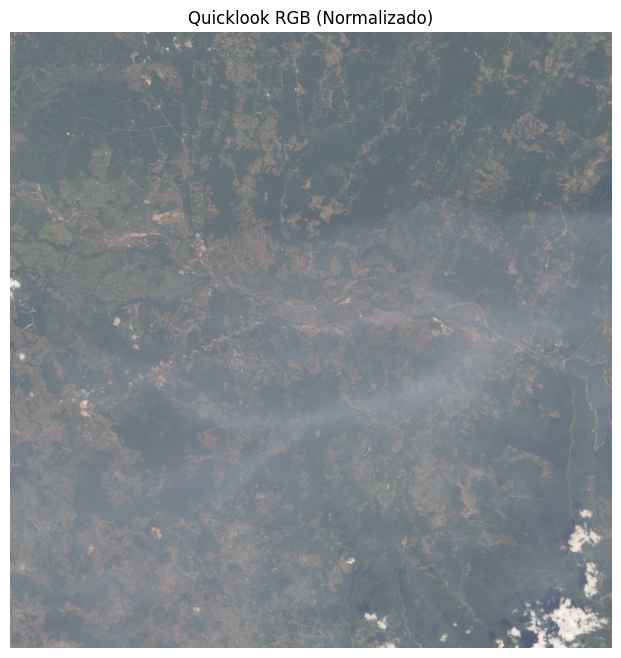

(1024, 1000)


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo
path = '/home/jleon13/Documents/Proyecto_5/ENMAP.HSI.L1B-20250531T123321Z-1-001/ENMAP.HSI.L1B/ENMAP01_003_V010502_20250506T214732Z/ENMAP01-____L1B-DT0000058231_20240123T155834Z_003_V010502_20250506T214732Z-QL_VNIR.TIF'
# Abrir y leer bandas RGB
with rasterio.open(path) as src:
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)

# Apilar en una imagen RGB
rgb = np.stack([r, g, b], axis=-1)

# Normalizar a [0, 1] si los valores son muy altos
rgb_norm = rgb / np.max(rgb)

# Visualización
plt.figure(figsize=(8, 8))
plt.imshow(rgb_norm)
plt.axis('off')
plt.title("Quicklook RGB (Normalizado)")
plt.show()

print(src.shape)


In [3]:
# Cuantas bandas tiene la imagen

with rasterio.open(path) as src:
    num_bandas = src.count
    print(f"La imagen tiene {num_bandas} bandas.")

La imagen tiene 4 bandas.


# Vizualización de imágenes .HDR

	Data Source:   '/home/jleon13/Documents/Proyecto_5/ENMAP.HSI.L1B-20250531T123321Z-1-001/ENMAP.HSI.L1B/ENMAP01_003_V010502_20250506T214732Z/ENMAP01-____L1B-DT0000058231_20240123T155834Z_003_V010502_20250506T214732Z-SPECTRAL_IMAGE_SWIR.BSQ'
	# Rows:           1024
	# Samples:        1000
	# Bands:           133
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16
Dimensiones: (1024, 1000, 133)
Forma del array de datos: (1024, 1000, 133)
Mínimo: 1.0
Máximo: 65535.0
Media: 20548.627


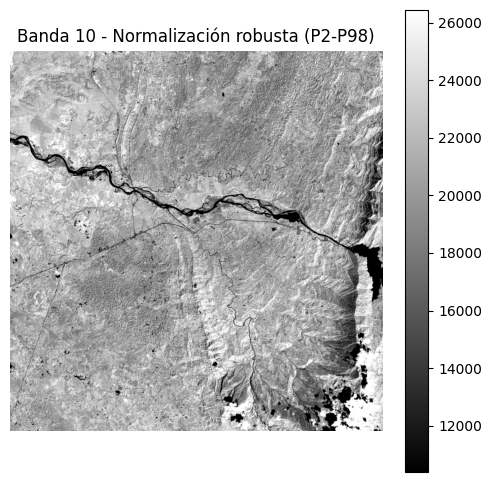

In [14]:
from spectral import open_image

# Ruta al archivo .HDR (que referencia al .BSQ)
hdr_path = '/home/jleon13/Documents/Proyecto_5/ENMAP.HSI.L1B-20250531T123321Z-1-001/ENMAP.HSI.L1B/ENMAP01_003_V010502_20250506T214732Z/ENMAP01-____L1B-DT0000058231_20240123T155834Z_003_V010502_20250506T214732Z-SPECTRAL_IMAGE_SWIR.HDR'
img = open_image(hdr_path)
print(img)
print(f"Dimensiones: {img.shape}")  # (filas, columnas, bandas)

# Leer todos los datos como un numpy array
data = img.load()
print("Forma del array de datos:", data.shape)

# Extraer la banda 10
banda_10 = np.squeeze(data[:, :, 10])
print("Mínimo:", np.min(banda_10))
print("Máximo:", np.max(banda_10))
print("Media:", np.mean(banda_10))

# Normalización robusta (percentiles 2-98)
vmin = np.percentile(banda_10, 2)
vmax = np.percentile(banda_10, 98)

plt.figure(figsize=(6, 6))
plt.imshow(banda_10, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Banda 10 - Normalización robusta (P2-P98)')
plt.colorbar()
plt.axis('off')
plt.show()


dict_keys(['description', 'samples', 'lines', 'bands', 'header offset', 'file type', 'data type', 'interleave', 'byte order', 'map info', 'band names', 'wavelength', 'fwhm', 'data ignore value', 'wavelength units', 'data gain values', 'data offset values'])
Banda 0: 901.962 nm
Banda 1: 911.572 nm
Banda 2: 921.32 nm
Banda 3: 931.204 nm
Banda 4: 941.218 nm
Banda 5: 951.361 nm
Banda 6: 961.629 nm
Banda 7: 972.017 nm
Banda 8: 982.524 nm
Banda 9: 993.145 nm
Banda 10: 1003.88 nm
Banda 11: 1014.72 nm
Banda 12: 1025.66 nm
Banda 13: 1036.7 nm
Banda 14: 1047.84 nm
Banda 15: 1059.07 nm
Banda 16: 1070.39 nm
Banda 17: 1081.79 nm
Banda 18: 1093.26 nm
Banda 19: 1104.81 nm
Banda 20: 1116.43 nm
Banda 21: 1128.11 nm
Banda 22: 1139.84 nm
Banda 23: 1151.62 nm
Banda 24: 1163.44 nm
Banda 25: 1175.31 nm
Banda 26: 1187.2 nm
Banda 27: 1199.11 nm
Banda 28: 1211.05 nm
Banda 29: 1223.0 nm
Banda 30: 1234.97 nm
Banda 31: 1246.95 nm
Banda 32: 1258.93 nm
Banda 33: 1270.92 nm
Banda 34: 1282.92 nm
Banda 35: 1294.91 nm


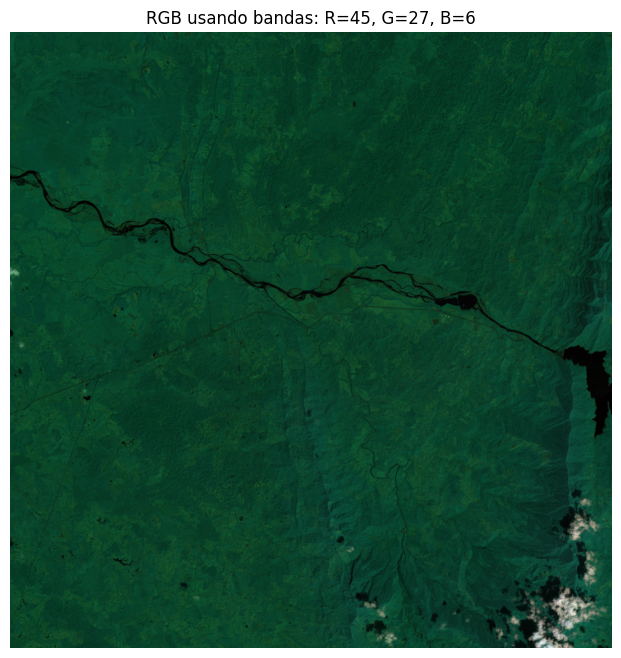

In [15]:
#@title **CODE:** Intento de vizualización en RGB desde el .HDR

hdr = img.metadata
print(hdr.keys())  # Mostrar todas las claves de metadata
wavelengths = hdr['wavelength'] #Longitudes de onda por banda
wavelengths = [float(w) for w in wavelengths]
for i, w in enumerate(wavelengths):
    print(f"Banda {i}: {w} nm")

# Número de la banda 45, 27, 6
data = img.load()

r_band = 45
g_band = 27
b_band = 6
r = np.squeeze(data[:, :, r_band])
g = np.squeeze(data[:, :, g_band])
b = np.squeeze(data[:, :, b_band])

rgb = np.stack([r, g, b], axis=-1)
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

plt.figure(figsize=(8,8))
plt.imshow(rgb_norm)
plt.title(f'RGB usando bandas: R={r_band}, G={g_band}, B={b_band}')
plt.axis('off')
plt.show()


In [16]:
hdr = img.metadata
wavelengths = hdr['wavelength']
wavelengths = [float(w) for w in wavelengths]

# Save to text file
output_file = 'wavelength_bands.txt'
with open(output_file, 'w') as f:
    for w in wavelengths:
        f.write(f"{w:.2f}\n")

print(f"Wavelength values saved to {output_file}")

Wavelength values saved to wavelength_bands.txt


# Identificar el número de endmembers que componen la mezcla espectral

Realización de Analisis de componentes principales (PCA) para reducir la dimensión espectral y observar cuantos componentes capturan la mayor varianza entre los diferentes canales de la imagen espectral a parr de las dependiencias lineales entre ellas.

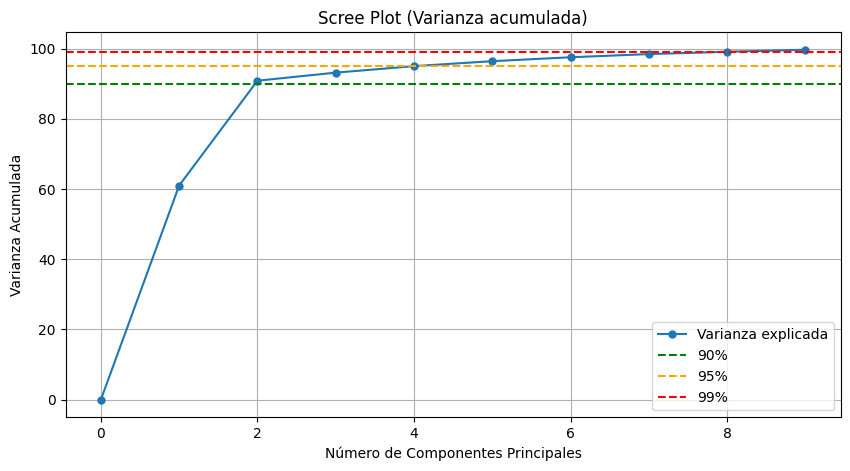

In [5]:
#@title **CODE:** Vizualización de número de componentes con mayor varianza

from sklearn.decomposition import PCA

# Reorganizar: (filas, columnas, bandas) → (n_pixels, bandas)
pixels = data.reshape(-1, data.shape[2])

x_plot = np.array([])
y_plot = np.array([])

for i in range(10):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(pixels)
    x_plot = np.append(x_plot, i)
    y_plot = np.append(y_plot, np.sum(pca.explained_variance_ratio_) * 100)

plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(x_plot, y_plot, marker="o", markersize=5, label='Varianza explicada')
plt.title('Scree Plot (Varianza acumulada)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.axhline(y=90, color='green', linestyle='--', label='90%')
plt.axhline(y=95, color='orange', linestyle='--', label='95%')
plt.axhline(y=99, color='red', linestyle='--', label='99%')
plt.legend()

In [6]:
from sklearn.decomposition import FactorAnalysis
import numpy as np

def calculate_fa_explained_variance_ratio(fa, X):
    # Get the components and noise variance
    components = fa.components_
    noise_variance = fa.noise_variance_
    
    # Calculate the reconstructed covariance matrix
    cov_model = np.dot(components.T, components) + np.diag(noise_variance)
    
    # Calculate the actual covariance matrix
    cov_data = np.cov(X, rowvar=False)
    
    # Calculate explained variance ratio
    total_var = np.trace(cov_data)
    explained_var = np.trace(cov_model)
    
    return explained_var / total_var

# Use in your loop
for i in range(1, 11):
    fa = FactorAnalysis(n_components=i, random_state=42)
    fa.fit(pixels)
    
    explained_var_ratio = calculate_fa_explained_variance_ratio(fa, pixels)
    y_plot = np.append(y_plot, explained_var_ratio * 100)

KeyboardInterrupt: 

Visible Near Infrared Range VNIR

# Clasificación no supervisada por k-means:

Con una varianza del 99% a partir del Scree Plot con un número de 6 componentes, hacemos una clasificación no supervisada de los posibles endmembers (materiales) en la imagen espectral.


Varianza conservada (2D): 0.90851504


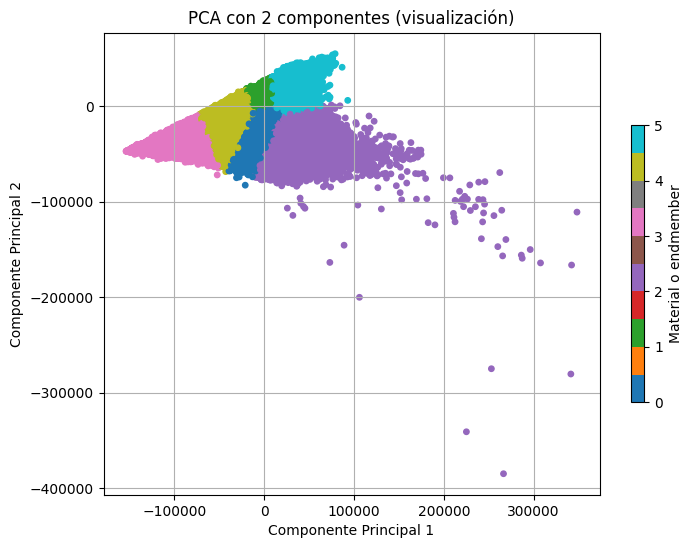

In [16]:
#@title **CODE:** KMeans y vizualización de los labels con PCA de 2 componentes
from sklearn.cluster import KMeans

# Reorganiza los datos: (filas, columnas, bandas) → (n_pixeles, bandas)
pixels = data.reshape(-1, data.shape[2])

kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(pixels) # Labels de los endMembers

# PCA a 2D para visualización
pca_2D = PCA(n_components=2)
X_pca_2D = pca_2D.fit_transform(pixels)
print('Varianza conservada (2D):', np.sum(pca_2D.explained_variance_ratio_))

# Create figure and axis objects with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=labels, cmap='tab10', s=15)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('PCA con 2 componentes (visualización)')
ax.grid(True)

# Add colorbar
plt.colorbar(scatter, ax=ax, shrink=0.6, label='Material o endmember')
plt.show()

# 📌 Resumen del método SLF (Spectral Linear Filter)

# **Objetivo:**
Detectar metano (CH₄) en imágenes hiperespectrales usando un filtro lineal adaptado a variaciones del terreno.  

1. **Firma espectral t del CH₄:**
Es un vector que representa la forma en que el metano absorbe la luz en distintas longitudes de onda.

2. **Clasificación del terreno (k clases):**
Se realiza una segmentación por K-means (u otro método) para agrupar píxeles según su firma espectral. Cada grupo o clase representa un tipo de terreno diferente (agua, suelo, vegetación, etc.).

3. **Covarianza por clase (Cov_k) y media espectral (μ_k)**  
Para cada clase k, se calcula:

* La media espectral μ_k: el promedio espectral de todos los píxeles en esa clase.

* La matriz de covarianza Cov_k: mide cómo varían las bandas espectrales entre sí dentro de esa clase.




# **Ecuación del filtro de Metane Mapper:**
$
\text{SLF}(x_{ij}) = \frac{(x_{ij} - \mu_k)^T \, \text{Cov}_k^{-1} \, t}{t^T \, \text{Cov}_k^{-1} \, t} \quad \text{donde } x_{ij} \in \text{clase } k
$
  
**FUNCIONAMIENTO:**  
  * Proyecta cada píxel corregido por su media en la dirección de t (la firma del CH₄).

* Aplica un “whitening” por clase, es decir, ajusta cada clase por su propia estadística espectral para reducir la influencia del fondo.

* Devuelve una imagen 2D (de tamaño filas × columnas) con posibles candidatos a CH₄.


# ***Filtro y uso de PCA***

Firma original shape: (133, 2)
Firma normalizada shape: (133, 1)


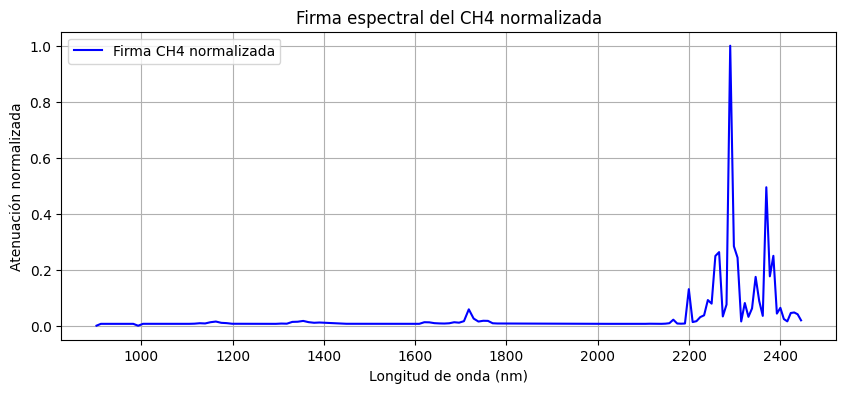

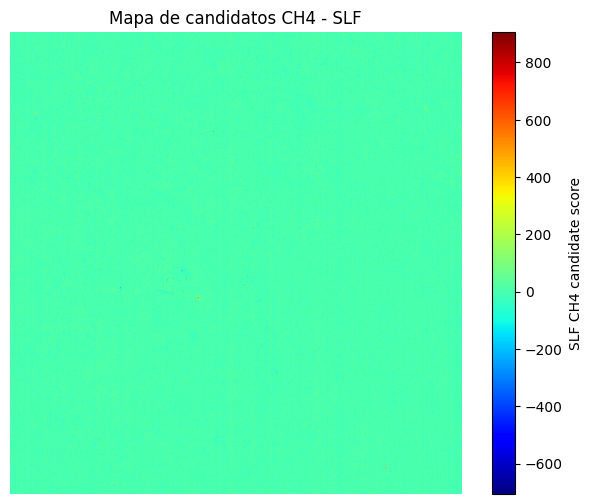

In [21]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def normalize_signature(signature_data, wavelengths_hdr):
    """
    Normaliza y ajusta la firma del metano a las longitudes de onda de la imagen
    """
    # Extraer longitudes de onda y valores de atenuación
    wavelengths_ch4 = signature_data[:, 0]  # Primera columna (longitudes de onda)
    attenuation = signature_data[:, 1]      # Segunda columna (atenuación)
    
    # Interpolar a las longitudes de onda de la imagen
    f = interp1d(wavelengths_ch4, attenuation, kind='linear', bounds_error=False, fill_value='extrapolate')
    attenuation_interpolated = f(wavelengths_hdr)
    
    # Normalización min-max
    attenuation_norm = (attenuation_interpolated - np.min(attenuation_interpolated)) / \
                      (np.max(attenuation_interpolated) - np.min(attenuation_interpolated))
    
    # Convertir a vector columna
    return attenuation_norm.reshape(-1, 1)

# 1. Cargar los datos
path_methane = '/home/jleon13/Documents/Proyecto_5/CH4_atenuation_filtered.txt'
wavelengths = np.array([float(w) for w in hdr['wavelength']])  # Longitudes de onda de la imagen

try:
    # Cargar firma del metano
    signature_data = np.loadtxt(path_methane)
    print("Firma original shape:", signature_data.shape)
    
    # Normalizar y ajustar la firma
    t = normalize_signature(signature_data, wavelengths)
    print("Firma normalizada shape:", t.shape)
    
    # Visualizar la firma normalizada
    plt.figure(figsize=(10, 4))
    plt.plot(wavelengths, t, 'b-', label='Firma CH4 normalizada')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Atenuación normalizada')
    plt.title('Firma espectral del CH4 normalizada')
    plt.grid(True)
    plt.legend()
    plt.show()
    
except Exception as e:
    print(f"Error procesando la firma: {e}")
    t = np.random.rand(len(wavelengths), 1)
    t = t / np.linalg.norm(t)
# 3. Preparar los datos
pixels = data.reshape(-1, data.shape[2])
n_clusters = 6

# 4. Calcular estadísticas por clase
means = []
covs = []

for k in range(n_clusters):
    idx = (labels == k)
    pixels_k = pixels[idx]
    mean_k = np.mean(pixels_k, axis=0)
    cov_k = np.cov(pixels_k, rowvar=False)
    means.append(mean_k)
    covs.append(cov_k)

means = np.array(means)
covs = np.array(covs)
covs_inv = np.array([np.linalg.pinv(cov) for cov in covs])

# 5. Aplicar SLF
R, C, B = data.shape
slf_map = np.zeros((R, C))

# Convertir t a vector columna una sola vez
t_vec = t.reshape(-1, 1)

for i in range(R):
    for j in range(C):
        k = labels_img[i, j]
        x_ij = data[i, j, :]
        mean_k = means[k]
        cov_inv_k = covs_inv[k]
        
        # Calcular diferencia
        diff = (x_ij - mean_k).reshape(-1, 1)
        
        # Calcular SLF
        numerator = (diff.T @ cov_inv_k @ t_vec)[0, 0]
        denominator = (t_vec.T @ cov_inv_k @ t_vec)[0, 0]
        slf_map[i, j] = numerator / denominator

# 6. Visualizar resultados
plt.figure(figsize=(8, 6))
plt.imshow(slf_map, cmap='jet')
plt.colorbar(label='SLF CH4 candidate score')
plt.title('Mapa de candidatos CH4 - SLF')
plt.axis('off')
plt.show()

In [22]:
import numpy as np

# Supongamos que hdr['wavelength'] ya fue leído antes
wavelengths = np.array([float(w) for w in hdr['wavelength']])
print("SWIR image wavelengths (nm):\n", wavelengths[:5], "...", wavelengths[-5:], "   len =", len(wavelengths))

# Carga la firma procesada (filtrada por parte entera)
signature_data = np.loadtxt('/home/jleon13/Documents/Proyecto_5/CH4_atenuation_filtered.txt')
print("Firma cruda (2 columnas) → primeras 5 filas:\n", signature_data[:5])
print("Firma cruda → últimas 5 filas:\n", signature_data[-5:])
print("Cantidad de filas en la firma:", signature_data.shape[0])


SWIR image wavelengths (nm):
 [901.962 911.572 921.32  931.204 941.218] ... [2415.21 2422.78 2430.32 2437.83 2445.3 ]    len = 133
Firma cruda (2 columnas) → primeras 5 filas:
 [[ 9.019600e+02 -1.373073e-03]
 [ 9.115700e+02 -0.000000e+00]
 [ 9.213200e+02 -0.000000e+00]
 [ 9.312000e+02 -0.000000e+00]
 [ 9.412200e+02 -0.000000e+00]]
Firma cruda → últimas 5 filas:
 [[2.415210e+03 1.849195e-03]
 [2.422780e+03 8.118439e-03]
 [2.430320e+03 8.531582e-03]
 [2.437830e+03 7.190271e-03]
 [2.445300e+03 2.630634e-03]]
Cantidad de filas en la firma: 133


# ***Normalización de Firma y Aplicación del Filtro Sin PCA***

/tmp/ipykernel_654/3157415907.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den = float(t_vec.T @ cov_inv @ t_vec)  # escalar
/tmp/ipykernel_654/3157415907.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = float(diff.T @ cov_inv @ t_vec)  # escalar


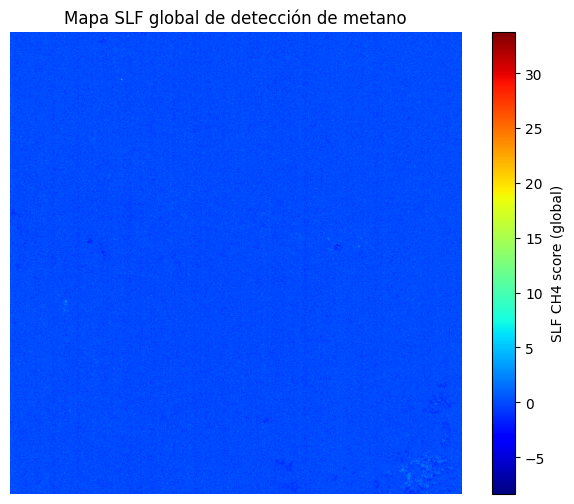

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paso A: Cargar datos de imagen SWIR y firma normalizada ---
# data   → 3D array (R x C x B), B = 133 bandas
# hdr['wavelength'] → lista/array de 133 longitudes de onda (nm) en el mismo orden que 'data'

# 1) Leer firma ya filtrada (longitud de onda nm + atenuación normalizada)
firma = np.loadtxt('/home/jleon13/Documents/Proyecto_5/H2O_atenuation_filtered.txt')  # shape = (133, 2)
# columna 0 = wavelengths (nm), columna 1 = atenuación normalizada
w_firma = firma[:, 0]
a_firma = firma[:, 1]

# 2) Leer longitudes del header y datos de imagen (estos ya los tenías cargados)
wavelengths_img = np.array([float(w) for w in hdr['wavelength']])  # vector (133,)
if not np.allclose(w_firma, wavelengths_img):
    raise ValueError(" ¡Las longitudes de onda de la firma NO coinciden con las del SWIR! ")

# 3) Tomamos la firma como un vector columna (133 × 1)
t_vec = a_firma.reshape(-1, 1)  # shape = (133, 1)

# --- Paso B: Calcular media y covarianza del fondo (usamos todos los píxeles como fondo) ---
R, C, B = data.shape
pixels = data.reshape(-1, B)    # (R*C, 133)

# Media global
mu = np.mean(pixels, axis=0).reshape(-1, 1)  # shape = (133,1)

# Covarianza global
#   np.cov espera shape = (n_dim, n_samples) si rowvar=True (por defecto), 
#   así que transponemos: (133, R*C) → obtenemos (133,133)
cov = np.cov(pixels, rowvar=False)  # shape = (133,133)

# Inversa (o pseudo-inversa) de Sigma
cov_inv = np.linalg.pinv(cov)

# --- Paso C: Recorrer cada píxel y calcular SLF ---
slf_map = np.zeros((R, C), dtype=np.float32)

den = float(t_vec.T @ cov_inv @ t_vec)  # escalar

for i in range(R):
    for j in range(C):
        xij = data[i, j, :].reshape(-1, 1)  # (133,1)
        diff = xij - mu                     # (133,1)
        num = float(diff.T @ cov_inv @ t_vec)  # escalar
        slf_map[i, j] = num / den

# --- Paso D: Visualizar mapa SLF global ---
plt.figure(figsize=(8, 6))
plt.imshow(slf_map, cmap='jet')
plt.colorbar(label='SLF CH4 score (global)')
plt.title('Mapa SLF global de detección de metano')
plt.axis('off')
plt.show()


# ***Uso de Factor Analysis***

Explained variance (aprox) con FA → no está explícito como PCA, pero puedes inspeccionar components_:
Varianza explicada PCA (2D) = 90.05%


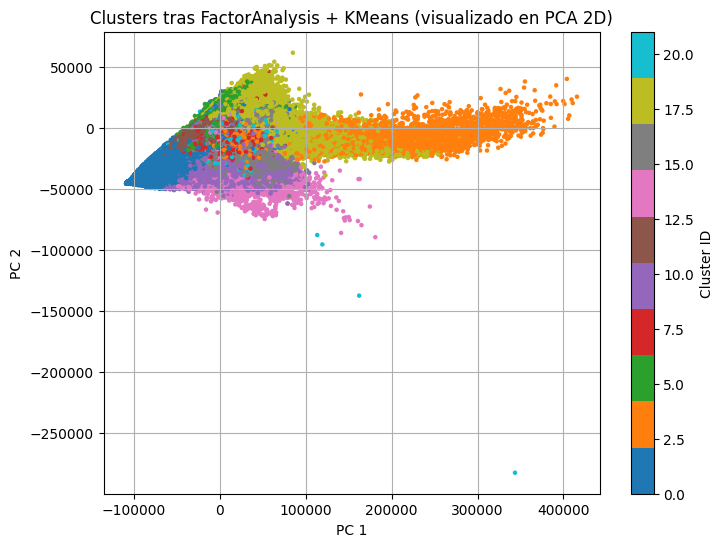

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

# 1) Reorganizar los píxeles para FA/KMeans
R, C, B = data.shape
pixels = data.reshape(-1, B)   # (n_pixels, 133)

# 2) FactorAnalysis para reducir dimensionalidad
n_factors = 10   # puedes probar varios (8, 10, 12, 15, …)
fa = FactorAnalysis(n_components=n_factors, random_state=0)
X_fa = fa.fit_transform(pixels)  # (n_pixels, n_factors)
print("Explained variance (aprox) con FA → no está explícito como PCA, pero puedes inspeccionar components_:")
# Nota: FA no da varianza explicada en sklearn, pero puedes inspeccionar fa.components_ o comparar reconstrucción.

# 3) KMeans sobre representación FA
n_clusters = 22
kmeans_fa = KMeans(n_clusters=n_clusters, random_state=0)
labels_fa = kmeans_fa.fit_predict(X_fa)  # etiquetas por píxel (long = R*C)

# 4) Reconstruir mapa de etiquetas
labels_img_fa = labels_fa.reshape(R, C)

# (Opcional) Visualizar clusters en PCA-2D para ver si FA separa mejor
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2, random_state=0)
X_pca2 = pca2.fit_transform(pixels)
explained2 = np.sum(pca2.explained_variance_ratio_)
print(f"Varianza explicada PCA (2D) = {explained2*100:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels_fa, s=5, cmap='tab10')
plt.title("Clusters tras FactorAnalysis + KMeans (visualizado en PCA 2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()


# ***Aplicación de Filtro***

 ¡Advertencia! El cluster 19 tiene solo 4 píxeles (< 133), podría dar problemas en covariancia.


/tmp/ipykernel_654/2514321217.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den_fa = float(t_vec.T @ cov_inv @ t_vec)   # Variable global si quisieras comparamos con SLF global
/tmp/ipykernel_654/2514321217.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = float(diff.T @ covs_inv[k] @ t_vec)
/tmp/ipykernel_654/2514321217.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den_k = float(t_vec.T @ covs_inv[k] @ t_vec)


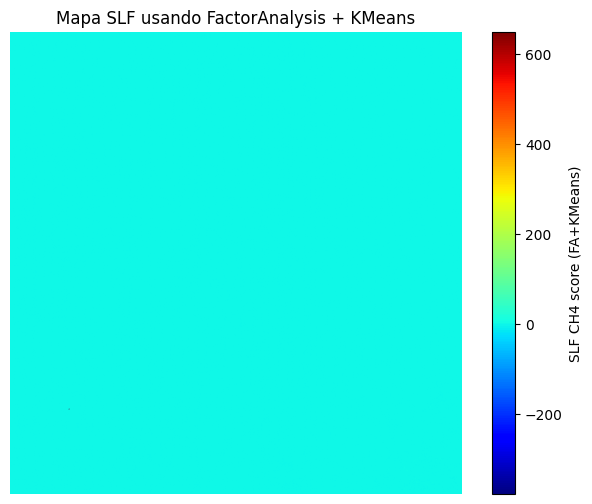

In [19]:
# 5) Para cada cluster (k = 0,1,...,n_clusters-1) calculamos media y cov inversa
means = []
covs_inv = []

for k in range(n_clusters):
    idx = (labels_fa == k)
    pixels_k = pixels[idx]  # (n_pixeles_cluster, 133)
    if pixels_k.shape[0] < B:
        # Si un cluster quedó demasiado pequeño, es posible que cov sea singular
        print(f" ¡Advertencia! El cluster {k} tiene solo {pixels_k.shape[0]} píxeles (< {B}), "
              f"podría dar problemas en covariancia.")
    mean_k = np.mean(pixels_k, axis=0).reshape(-1, 1)       # (133,1)
    cov_k = np.cov(pixels_k, rowvar=False)                  # (133,133)
    cov_k_inv = np.linalg.pinv(cov_k)                       # (133,133)
    means.append(mean_k)
    covs_inv.append(cov_k_inv)

means = np.concatenate(means, axis=1)       # forma (133, n_clusters)
covs_inv = np.stack(covs_inv, axis=0)       # forma (n_clusters, 133, 133)

# 6) Generar mapa SLF por cluster
slf_map_fa = np.zeros((R, C), dtype=np.float32)

den_fa = float(t_vec.T @ cov_inv @ t_vec)   # Variable global si quisieras comparamos con SLF global
# Pero para cada cluster, el denominador cambia:
for i in range(R):
    for j in range(C):
        k = labels_img_fa[i, j]
        xij = data[i, j, :].reshape(-1, 1)
        diff = xij - means[:, [k]]         # (133,1)
        num = float(diff.T @ covs_inv[k] @ t_vec)
        den_k = float(t_vec.T @ covs_inv[k] @ t_vec)
        # Evitar división por cero
        if np.isclose(den_k, 0):
            slf_map_fa[i, j] = 0.0
        else:
            slf_map_fa[i, j] = num / den_k

# 7) Visualizar SLF con clusters (FA)
plt.figure(figsize=(8, 6))
plt.imshow(slf_map_fa, cmap='jet')
plt.colorbar(label='SLF CH4 score (FA+KMeans)')
plt.title('Mapa SLF usando FactorAnalysis + KMeans')
plt.axis('off')
plt.show()


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=0)
X_pca = pca.fit_transform(pixels)
kmeans_pca = KMeans(n_clusters=6, random_state=0)
labels_pca = kmeans_pca.fit_predict(X_pca)
labels_img_pca = labels_pca.reshape(R, C)


In [27]:
eigvals = np.linalg.eigvalsh(cov)
print("Autovalores de cov global:\n", eigvals[:5], "...", eigvals[-5:])
print("Autovalores mínimos muy cercanos a cero =", np.min(eigvals) < 1e-8)


Autovalores de cov global:
 [578.14484934 607.54792763 619.97611467 622.9164533  631.26442818] ... [1.06005177e+07 1.39102527e+07 1.72382521e+07 2.24237986e+08
 4.58161463e+08]
Autovalores mínimos muy cercanos a cero = False


# ***Visualización y corrección:***

⚠️  Cluster 0 muy pequeño (n=18 < B=133), aplicando regularización fuerte.


/tmp/ipykernel_654/3619165551.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = float(diff.T @ covs_inv[k] @ t_vec)       # escalar
/tmp/ipykernel_654/3619165551.py:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den_k = float(t_vec.T @ covs_inv[k] @ t_vec)    # escalar


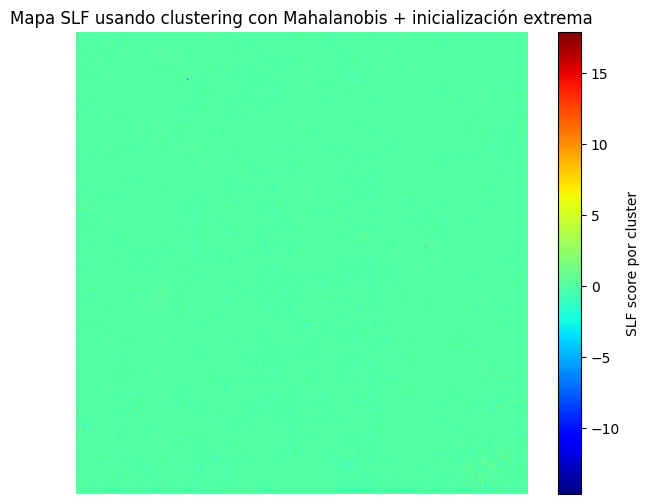

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# -------------------------------------------------------------------------
# Paso A: Cargar datos de imagen SWIR y firma normalizada
# -------------------------------------------------------------------------
# data   → 3D array (R x C x B), B = 133 bandas
# hdr['wavelength'] → lista/array de 133 longitudes de onda (nm) en el mismo orden que 'data'

# 1) Leer firma ya filtrada (longitud de onda nm + atenuación normalizada)
firma = np.loadtxt('/home/jleon13/Documents/Proyecto_5/H2O_atenuation_filtered.txt')  # shape = (133, 2)
# Columna 0 = wavelengths (nm), Columna 1 = atenuación normalizada
w_firma = firma[:, 0]
a_firma = firma[:, 1]

# 2) Leer longitudes del header y datos de imagen (estos ya los tenías cargados)
wavelengths_img = np.array([float(w) for w in hdr['wavelength']])  # vector (133,)
if not np.allclose(w_firma, wavelengths_img):
    raise ValueError("¡Desalineación detectada! w_firma y wavelengths_img no coinciden.")

# 3) Firma como vector columna (133 × 1)
t_vec = a_firma.reshape(-1, 1)  # (133, 1)

# -------------------------------------------------------------------------
# Paso B: Preparar pixeles e información global
# -------------------------------------------------------------------------
R, C, B = data.shape
pixels = data.reshape(-1, B)  # (R*C, 133)

# Media global
mu_global = np.mean(pixels, axis=0).reshape(-1, 1)  # (133, 1)

# Covarianza global
cov_global = np.cov(pixels, rowvar=False)  # (133, 133)
# Pseudoinversa para más adelante
cov_global_inv = np.linalg.pinv(cov_global)

# Para clustering en métric a Mahalanobis: calculamos cov_global^{-1/2}
#  Hacemos eigen-decomposition de cov_global:
eigvals, eigvecs = np.linalg.eigh(cov_global)
# Para evitar división por cero en autovalores muy pequeños, floateamos un epsilon:
eps_eig = 1e-6
eigvals_clipped = np.maximum(eigvals, eps_eig)
cov_global_inv_sqrt = eigvecs @ np.diag(1.0 / np.sqrt(eigvals_clipped)) @ eigvecs.T  # (133,133)

# Whiten de los pixeles para clustering Mahalanobis:
pixels_centered = pixels - mu_global.ravel()  # (N, 133)
pixels_whitened = pixels_centered @ cov_global_inv_sqrt  # (N, 133)

# -------------------------------------------------------------------------
# Paso C: Clustering en el espacio espectral usando Mahalanobis + Inicialización "extrema"
# -------------------------------------------------------------------------
n_clusters = 22

# 1) Obtener primer componente principal de todos los píxeles (para inicialización extrema)
pca_init = PCA(n_components=1, random_state=0)
pc1_scores = pca_init.fit_transform(pixels_whitened).ravel()  # (N,)

# 2) Ordenar índices por la puntuación en PC1
sorted_idx = np.argsort(pc1_scores)
N = pixels_whitened.shape[0]
# Elegimos K centroides iniciales tomando puntos equiespaciados en la lista ordenada
positions = (np.linspace(0, N - 1, n_clusters)).astype(int)
init_centroids = pixels_whitened[sorted_idx[positions]]  # (n_clusters, 133)

# 3) Ejecutar KMeans con init personalizado (los centroides "extremos" basados en PC1)
kmeans = KMeans(
    n_clusters=n_clusters,
    init=init_centroids,
    n_init=1,            # Ya usamos init personalizado
    max_iter=300,
    random_state=0
)
labels = kmeans.fit_predict(pixels_whitened)  # etiquetas (N,)
labels_img = labels.reshape(R, C)  # (R, C)

# -------------------------------------------------------------------------
# Paso D: Calcular medias y covarianzas regularizadas por cluster
# -------------------------------------------------------------------------
epsilon_reg = 1e-6  # factor de regularización para covarianza

means = []
covs_inv = []

for k in range(n_clusters):
    idx_k = (labels == k)
    pixels_k = pixels[idx_k]  # (n_k, 133)

    # Revisar tamaño del cluster
    if pixels_k.shape[0] < B:
        print(f"⚠️  Cluster {k} muy pequeño (n={pixels_k.shape[0]} < B={B}), aplicando regularización fuerte.")

    # Media de cluster
    mean_k = np.mean(pixels_k, axis=0).reshape(-1, 1)  # (133, 1)

    # Covarianza de cluster
    cov_k = np.cov(pixels_k, rowvar=False)  # (133, 133)

    # Regularizar covarianza: Σ_k_reg = Σ_k + ε · I
    cov_k_reg = cov_k + epsilon_reg * np.eye(B)

    # Pseudoinversa de la covarianza regularizada
    cov_k_inv = np.linalg.pinv(cov_k_reg)  # (133, 133)

    means.append(mean_k)
    covs_inv.append(cov_k_inv)

means = np.concatenate(means, axis=1)  # (133, n_clusters)
covs_inv = np.stack(covs_inv, axis=0)  # (n_clusters, 133, 133)

# -------------------------------------------------------------------------
# Paso E: Cálculo del Matched Filter por cluster (SLF) y visualización
# -------------------------------------------------------------------------


slf_map_fa = np.zeros((R, C), dtype=np.float32)

for i in range(R):
    for j in range(C):
        k = labels_img[i, j]
        x_ij = data[i, j, :].reshape(-1, 1)             # (133, 1)
        diff = x_ij - means[:, [k]]                     # (133, 1)
        num = float(diff.T @ covs_inv[k] @ t_vec)       # escalar
        den_k = float(t_vec.T @ covs_inv[k] @ t_vec)    # escalar

        # Dividir, evitando división por cero
        slf_map_fa[i, j] = 0.0 if np.isclose(den_k, 0.0) else (num / den_k)

# Visualizar mapa SLF clustered
plt.figure(figsize=(8, 6))
plt.imshow(slf_map_fa, cmap='jet')
plt.colorbar(label='SLF score por cluster')
plt.title('Mapa SLF usando clustering con Mahalanobis + inicialización extrema')
plt.axis('off')
plt.show()


In [21]:
print("Firma (primeros 3):", w_firma[:3],    "…últimos 3:", w_firma[-3:])
print("Hdr  (primeros 3):", wavelengths_img[:3], "…últimos 3:", wavelengths_img[-3:])


Firma (primeros 3): [901.96 911.57 921.32] …últimos 3: [2430.32 2437.83 2445.3 ]
Hdr  (primeros 3): [901.962 911.572 921.32 ] …últimos 3: [2430.32 2437.83 2445.3 ]


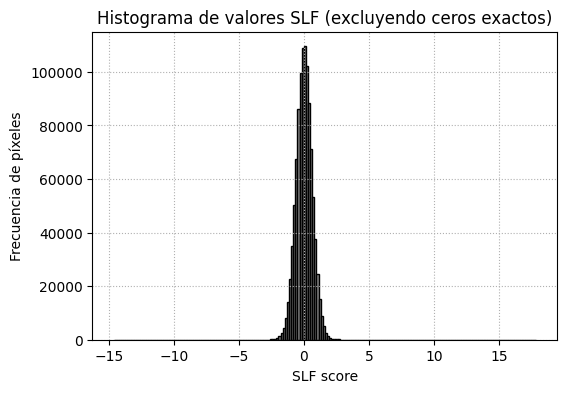

In [22]:
import matplotlib.pyplot as plt

# A) Rehúsa valores ceros exactos (pueden venir de clusters sin datos o división por cero)
vals = slf_map_fa.flatten()
vals_nonzero = vals[np.abs(vals) > 1e-8]  # filtramos los ceros absolutos

plt.figure(figsize=(6,4))
plt.hist(vals_nonzero, bins=200, color='gray', edgecolor='black')
plt.title("Histograma de valores SLF (excluyendo ceros exactos)")
plt.xlabel("SLF score")
plt.ylabel("Frecuencia de píxeles")
plt.grid(True, ls=':')
plt.show()


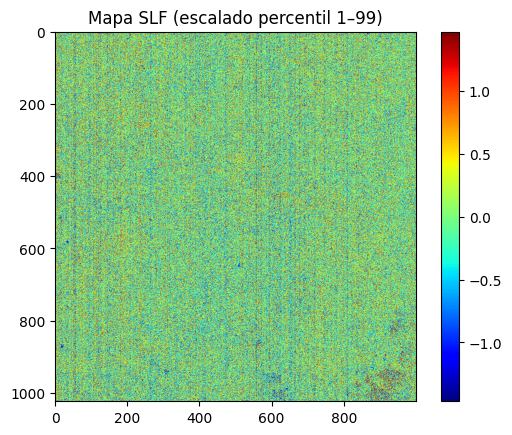

In [23]:
vmin, vmax = np.percentile(vals_nonzero, [1, 99])
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title("Mapa SLF (escalado percentil 1–99)")
plt.show()


In [24]:
from collections import Counter

counts = Counter(labels)
for k in range(n_clusters):
    n_k = counts[k]
    print(f"Cluster {k:02d}: {n_k} píxeles → {'⚠️ MUY PEQUEÑO' if n_k < B else ''}")


Cluster 00: 18 píxeles → ⚠️ MUY PEQUEÑO
Cluster 01: 88952 píxeles → 
Cluster 02: 16570 píxeles → 
Cluster 03: 2805 píxeles → 
Cluster 04: 12447 píxeles → 
Cluster 05: 85399 píxeles → 
Cluster 06: 48042 píxeles → 
Cluster 07: 107978 píxeles → 
Cluster 08: 27372 píxeles → 
Cluster 09: 6641 píxeles → 
Cluster 10: 86035 píxeles → 
Cluster 11: 49068 píxeles → 
Cluster 12: 43495 píxeles → 
Cluster 13: 75262 píxeles → 
Cluster 14: 37715 píxeles → 
Cluster 15: 100035 píxeles → 
Cluster 16: 24288 píxeles → 
Cluster 17: 6440 píxeles → 
Cluster 18: 84150 píxeles → 
Cluster 19: 90054 píxeles → 
Cluster 20: 28840 píxeles → 
Cluster 21: 2394 píxeles → 


In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1) PCA a p componentes
p = 10
pca = PCA(n_components=p, random_state=0)
X_pca = pca.fit_transform(pixels)  # (N, p)
print(f"PCA: retenemos {np.sum(pca.explained_variance_ratio_)*100:.2f}% de varianza con p={p}")

# 2) Inicialización extrema sobre PC1
pc1 = X_pca[:, 0]
sorted_idx_p1 = np.argsort(pc1)
pos = (np.linspace(0, N - 1, n_clusters)).astype(int)
init_pca = X_pca[sorted_idx_p1[pos]]

# 3) KMeans en espacio PCA
kmeans_pca = KMeans(
    n_clusters=n_clusters,
    init=init_pca,
    n_init=1,
    max_iter=300,
    random_state=0
)
labels_pca = kmeans_pca.fit_predict(X_pca)
labels_img_pca = labels_pca.reshape(R, C)

# 4) Cálculo de medias y covarianzas en espacio original para cada cluster PCA
means_pca, covs_inv_pca = [], []
counts_pca = Counter(labels_pca)
for k in range(n_clusters):
    idx_k = (labels_pca == k)
    pix_k = pixels[idx_k]
    # Revisar tamaño
    if counts_pca[k] < B:
        print(f"  ≥ Cluster PCA {k} tiene {counts_pca[k]} pixeles (<{B}), regularizando mucho.")
    mu_k = np.mean(pix_k, axis=0, keepdims=True).T
    cov_k = np.cov(pix_k, rowvar=False)
    cov_k_reg = cov_k + epsilon_reg * np.eye(B)
    covs_inv_pca.append(np.linalg.pinv(cov_k_reg))
    means_pca.append(mu_k)

means_pca = np.concatenate(means_pca, axis=1)       # (133, n_clusters)
covs_inv_pca = np.stack(covs_inv_pca, axis=0)       # (n_clusters,133,133)

# 5) SLF por cluster PCA y comparar histograma/contraste
slf_map_pca = np.zeros((R, C), dtype=np.float32)
for i in range(R):
    for j in range(C):
        k = labels_img_pca[i, j]
        xij = data[i, j, :].reshape(-1, 1)
        diff = xij - means_pca[:, [k]]
        num  = float(diff.T @ covs_inv_pca[k] @ t_vec)
        den_k = float(t_vec.T @ covs_inv_pca[k] @ t_vec)
        slf_map_pca[i, j] = 0.0 if np.isclose(den_k, 0.0) else num / den_k

# Histograma comparativo
vals_pca = slf_map_pca.flatten()
vals_mah = slf_map_fa.flatten()
print("Rango SLF (Mahalanobis):", np.percentile(vals_mah,[1,99]))
print("Rango SLF (PCA)       :", np.percentile(vals_pca,[1,99]))



PCA: retenemos 99.85% de varianza con p=10


/tmp/ipykernel_654/675592702.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num  = float(diff.T @ covs_inv_pca[k] @ t_vec)
/tmp/ipykernel_654/675592702.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den_k = float(t_vec.T @ covs_inv_pca[k] @ t_vec)


Rango SLF (Mahalanobis): [-1.46712758  1.47001095]
Rango SLF (PCA)       : [-1.46082134  1.46825346]


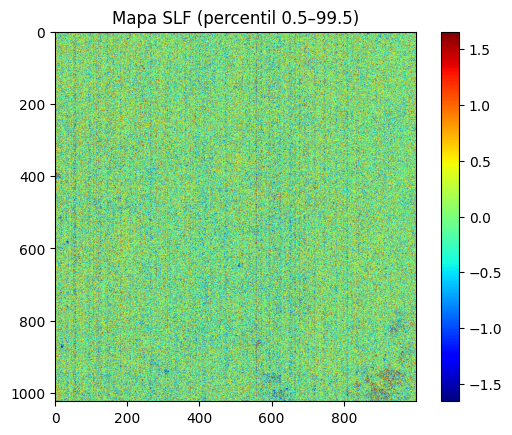

In [26]:
vals = slf_map_fa.flatten()
vals_nonzero = vals[np.abs(vals) > 1e-8]
vmin, vmax = np.percentile(vals_nonzero, [0.5, 99.5])  # recortar colas
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title("Mapa SLF (percentil 0.5–99.5)")
plt.show()


In [27]:
# 1) Escoge un pixel puro de fondo:
pixel00 = data[0, 0, :].reshape(-1, 1)  # (133,1)

# 2) Súmale un 10 % de la firma normalizada:
x_sint = pixel00 + 0.10 * t_vec

# 3) Decide a qué cluster pertenecería este píxel:
#    (usamos el modelo KMeans sobre pixels_whitened)
xw_sint = (x_sint.ravel() - mu_global.ravel()) @ cov_global_inv_sqrt  # (133,)
cluster_sint = kmeans.predict([xw_sint])[0]

# 4) Calcula SLF_sint con Σ_cluster_sint^{-1} y μ_cluster_sint
mean_k = means[:, cluster_sint].reshape(-1, 1)
covinv_k = covs_inv[cluster_sint]
diff_sint = x_sint - mean_k
num_sint = float(diff_sint.T @ covinv_k @ t_vec)
den_sint = float(t_vec.T @ covinv_k @ t_vec)
slf_sint = 0.0 if np.isclose(den_sint, 0.0) else num_sint / den_sint

print("SLF fondo original (aprox):", float(((pixel00 - mu_global).T @ cov_global_inv @ t_vec) / (t_vec.T @ cov_global_inv @ t_vec)))
print("SLF pixel sintético:", slf_sint)


SLF fondo original (aprox): 0.38810436028749745
SLF pixel sintético: 1.1355973986659982


/tmp/ipykernel_654/1867279786.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_sint = float(diff_sint.T @ covinv_k @ t_vec)
/tmp/ipykernel_654/1867279786.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den_sint = float(t_vec.T @ covinv_k @ t_vec)
/tmp/ipykernel_654/1867279786.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("SLF fondo original (aprox):", float(((pixel00 - mu_global).T @ cov_global_inv @ t_vec) / (t_vec.T @ cov_global_inv @ t_

# ***New Changes***

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

# -------------------------------------------------------------------------
# PASO A: CARGAR DATOS DE IMAGEN SWIR Y FIRMA NORMALIZADA
# -------------------------------------------------------------------------
# data   → 3D array (R x C x B), B = 133 bandas
# hdr['wavelength'] → array de 133 longitudes de onda (nm)

# 1) Leer firma H₂O ya filtrada (λ en nm + atenuación normalizada)
firma = np.loadtxt('/home/jleon13/Documents/Proyecto_5/H2O_atenuation_filtered.txt')  # shape = (133, 2)
w_firma = firma[:, 0]     # Columna 0: wavelengths (nm)
a_firma = firma[:, 1]     # Columna 1: atenuación normalizada

# 2) Leer longitudes del header y datos de imagen
wavelengths_img = np.array([float(w) for w in hdr['wavelength']])  # vector (133,)

# Verificación estricta redondeando a 4 decimales
w_firma_4d   = np.round(w_firma, 4)
wav_img_4d   = np.round(wavelengths_img, 4)
if not np.array_equal(w_firma_4d, wav_img_4d):
    raise ValueError("¡Desalineación detectada! w_firma y wavelengths_img no coinciden tras redondear.")

# 3) Firma como vector columna (133 × 1)
t_vec = a_firma.reshape(-1, 1)  # shape = (133, 1)

# -------------------------------------------------------------------------
# PASO B: PREPARAR PÍXELES E INFORMACIÓN GLOBAL
# -------------------------------------------------------------------------
R, C, B = data.shape
pixels = data.reshape(-1, B)  # (R*C, 133)

# Media global del fondo
mu_global = np.mean(pixels, axis=0).reshape(-1, 1)  # (133, 1)

# Covarianza global del fondo
cov_global = np.cov(pixels, rowvar=False)            # (133, 133)
# Pseudoinversa para más adelante (MU)
cov_global_inv = np.linalg.pinv(cov_global)

# -------------------------------------------------------------------------
# PASO C: CLUSTERING EN ESPACIO MAHALANOBIS + INICIALIZACIÓN “EXTREMA”
# -------------------------------------------------------------------------
# Parám.: número de clusters (empieza pequeño, luego ajustamos)
n_clusters = 10

# 1) Preparar “whitening” global para Mahalanobis
#    descomponemos autovalores/autovectores de cov_global
eigvals, eigvecs = np.linalg.eigh(cov_global)
eps_eig = 1e-6
eigvals_clipped = np.maximum(eigvals, eps_eig)
cov_global_inv_sqrt = eigvecs @ np.diag(1.0 / np.sqrt(eigvals_clipped)) @ eigvecs.T  # (133,133)

# 2) Whiten de los píxeles: (x - μ) · Σ^{-1/2}
pixels_centered   = pixels - mu_global.ravel()         # (N, 133)
pixels_whitened   = pixels_centered @ cov_global_inv_sqrt  # (N, 133)
N = pixels_whitened.shape[0]

# 3) Inicialización extrema basada en PC1 de pixels_whitened
pca_init    = PCA(n_components=1, random_state=0)
pc1_scores  = pca_init.fit_transform(pixels_whitened).ravel()  # (N,)
sorted_idx  = np.argsort(pc1_scores)
positions   = (np.linspace(0, N - 1, n_clusters)).astype(int)
init_centroids = pixels_whitened[sorted_idx[positions]]       # (n_clusters, 133)

# 4) Ejecutar KMeans con init personalizado (extremo en PC1)
kmeans = KMeans(
    n_clusters=n_clusters,
    init=init_centroids,
    n_init=1,            # ya usamos init
    max_iter=300,
    random_state=0
)
labels = kmeans.fit_predict(pixels_whitened)  # (N,)
labels_img = labels.reshape(R, C)             # (R, C)

# Chequear tamaños de cluster
counts = Counter(labels)
print("Tamaños de cada cluster:")
for k in range(n_clusters):
    print(f"  Cluster {k:02d}: {counts[k]} píxeles  {'⚠️ PEQUEÑO' if counts[k] < B else ''}")

# -------------------------------------------------------------------------
# PASO D: REDUCIR CLUSTERS DEMASIADO PEQUEÑOS (SI EXISTEN)
# -------------------------------------------------------------------------
# Por cada cluster con menos de B muestras, reasignar sus píxeles al vecino más cercano
small_labels = [k for k, n_k in counts.items() if n_k < B]
if small_labels:
    print("\nReasignando clusters demasiado pequeños:", small_labels)
    for k_small in small_labels:
        idx_small = np.where(labels == k_small)[0]  # índices lineales de pixeles en cluster k_small
        for idx_lin in idx_small:
            x_pix = pixels[idx_lin, :].reshape(-1, 1)  # (133,1)
            # Calcular dist Mahalanobis a cada media_k (aún no calculadas medias, así que calculamos medias globales provisionales)
            # Primero calculamos medias y covarianzas globales por cluster (sin regularizar)
            # Para simplicidad, reasignamos al cluster con más muestras
            k_target = max(counts, key=lambda k: counts[k] if k != k_small else -1)
            labels[idx_lin] = k_target
    # Volver a recalcular counts después de reasignar
    counts = Counter(labels)
    print("Tamaños de cluster tras reasignar pequeños:")
    for k in range(n_clusters):
        print(f"  Cluster {k:02d}: {counts[k]} píxeles")

labels_img = labels.reshape(R, C)

# -------------------------------------------------------------------------
# PASO E: CALCULAR MEDIAS Y COVARIANZAS REGULARIZADAS POR CLUSTER
# -------------------------------------------------------------------------
epsilon_reg = 1e-3  # regularización más alta para asegurar invertibilidad
means    = []
covs_inv = []

for k in range(n_clusters):
    idx_k  = (labels == k)
    pixels_k = pixels[idx_k]  # (n_k, 133)
    n_k = pixels_k.shape[0]

    # Advertencia si sigue muy pequeño
    if n_k < B:
        print(f"⚠️  Cluster {k} aún pequeño (n={n_k} < B={B}), regularización mayor necesaria.")

    # Media de cluster k
    mean_k = np.mean(pixels_k, axis=0).reshape(-1, 1)  # (133, 1)

    # Covarianza de cluster k
    cov_k = np.cov(pixels_k, rowvar=False)  # (133, 133)

    # Regularizar covarianza: Σ_k_reg = Σ_k + ε · I
    cov_k_reg = cov_k + epsilon_reg * np.eye(B)

    # Pseudoinversa de la covarianza regularizada
    cov_k_inv = np.linalg.pinv(cov_k_reg)  # (133, 133)

    means.append(mean_k)
    covs_inv.append(cov_k_inv)

means    = np.concatenate(means, axis=1)        # (133, n_clusters)
covs_inv = np.stack(covs_inv, axis=0)           # (n_clusters, 133, 133)

# -------------------------------------------------------------------------
# PASO F: CÁLCULO DEL MATCHED FILTER POR CLUSTER (SLF) Y VISUALIZACIÓN
# -------------------------------------------------------------------------
slf_map_fa = np.zeros((R, C), dtype=np.float32)

for i in range(R):
    for j in range(C):
        k = labels_img[i, j]
        x_ij = data[i, j, :].reshape(-1, 1)            # (133, 1)
        diff = x_ij - means[:, [k]]                    # (133, 1)
        num = float(diff.T @ covs_inv[k] @ t_vec)      # escalar
        den_k = float(t_vec.T @ covs_inv[k] @ t_vec)   # escalar

        # Dividir, evitando división por cero
        slf_map_fa[i, j] = 0.0 if np.isclose(den_k, 0.0) else (num / den_k)

# Histograma de valores SLF (excluyendo ceros exactos)
vals = slf_map_fa.flatten()
vals_nonzero = vals[np.abs(vals) > 1e-8]
plt.figure(figsize=(6, 4))
plt.hist(vals_nonzero, bins=200, color='gray', edgecolor='black')
plt.title("Histograma de valores SLF (excluyendo ceros exactos)")
plt.xlabel("SLF score")
plt.ylabel("Frecuencia de píxeles")
plt.grid(True, ls=':')
plt.show()

# Escalado percentil 1-99
vmin, vmax = np.percentile(vals_nonzero, [1, 99])
plt.figure(figsize=(8, 6))
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar(label='SLF score (percentil 1–99)')
plt.title("Mapa SLF usando clustering con Mahalanobis + inicialización extrema")
plt.axis('off')
plt.show()

# -------------------------------------------------------------------------
# PASO G: PROBADA DE PIXEL SINTÉTICO PARA VALIDAR SLF
# -------------------------------------------------------------------------
# 1) Seleccionar un píxel de fondo real
pixel00 = data[0, 0, :].reshape(-1, 1)  # (133, 1)
# 2) Inyectar un 10 % de la firma
x_sint = pixel00 + 0.10 * t_vec
# 3) Buscar cluster al que pertenecería x_sint
xw_sint = ((x_sint.ravel() - mu_global.ravel()) @ cov_global_inv_sqrt).reshape(1, -1)
cluster_sint = kmeans.predict(xw_sint)[0]
# 4) Calcular SLF de x_sint
mean_k = means[:, cluster_sint].reshape(-1, 1)
covinv_k = covs_inv[cluster_sint]
diff_sint = x_sint - mean_k
num_sint = float(diff_sint.T @ covinv_k @ t_vec)
den_sint = float(t_vec.T @ covinv_k @ t_vec)
slf_sint = 0.0 if np.isclose(den_sint, 0.0) else (num_sint / den_sint)

# SLF de fondo original en ese cluster
# (tomamos pixel00 y lo proyectamos igual)
diff_fondo = pixel00 - mean_k
num_fondo = float(diff_fondo.T @ covinv_k @ t_vec)
den_fondo = den_sint  # mismo denominador
slf_fondo = 0.0 if np.isclose(den_fondo, 0.0) else (num_fondo / den_fondo)

print("\nSLF fondo original (cluster", cluster_sint, "):", slf_fondo)
print("SLF pixel sintético (cluster", cluster_sint, "):", slf_sint)

# -------------------------------------------------------------------------
# PASO H (OPCIONAL): CLUSTER EN ESPACIO PCA Y COMPARAR CONTRASTE
# -------------------------------------------------------------------------
# 1) PCA a 10 componentes en pixeles originales
pca = PCA(n_components=10, random_state=0)
X_pca10 = pca.fit_transform(pixels)  
expl_var = np.sum(pca.explained_variance_ratio_)
print(f"\nPCA: retenemos {expl_var*100:.2f}% de varianza con p=10 (clustering PCA)")

# 2) KMeans (inicialización k-means++)
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
labels_pca = kmeans_pca.fit_predict(X_pca10)
labels_img_pca = labels_pca.reshape(R, C)

# 3) Calcular medias y covarianzas regularizadas para clusters PCA
means_pca, covs_inv_pca = [], []
for k in range(n_clusters):
    idx_k = (labels_pca == k)
    pix_k = pixels[idx_k]
    mu_k = np.mean(pix_k, axis=0).reshape(-1, 1)
    cov_k = np.cov(pix_k, rowvar=False)
    cov_k_reg = cov_k + epsilon_reg * np.eye(B)
    covs_inv_pca.append(np.linalg.pinv(cov_k_reg))
    means_pca.append(mu_k)

means_pca    = np.concatenate(means_pca, axis=1)       # (133, n_clusters)
covs_inv_pca = np.stack(covs_inv_pca, axis=0)          # (n_clusters, 133, 133)

# 4) SLF por cluster PCA
slf_map_pca = np.zeros((R, C), dtype=np.float32)
for i in range(R):
    for j in range(C):
        k = labels_img_pca[i, j]
        xij = data[i, j, :].reshape(-1, 1)
        diff = xij - means_pca[:, [k]]
        num  = float(diff.T @ covs_inv_pca[k] @ t_vec)
        den_k = float(t_vec.T @ covs_inv_pca[k] @ t_vec)
        slf_map_pca[i, j] = 0.0 if np.isclose(den_k, 0.0) else (num / den_k)

# 5) Medir rango percentil 1–99 de ambos mapas
vals_mah = slf_map_fa.flatten()
vals_pca = slf_map_pca.flatten()
contraste_mah = np.percentile(vals_mah, 99) - np.percentile(vals_mah, 1)
contraste_pca = np.percentile(vals_pca, 99) - np.percentile(vals_pca, 1)
print(f"\nContraste SLF (Mahalanobis) = {contraste_mah:.4f}")
print(f"Contraste SLF (PCA)         = {contraste_pca:.4f}")

# 6) Visualización comparativa de SLF PCA y Mahalanobis (percentil 1–99)
vmin_pca, vmax_pca = np.percentile(vals_pca[np.abs(vals_pca)>1e-8], [1, 99])
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.title('SLF Mahalanobis (1–99 percentil)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(slf_map_pca, cmap='jet', vmin=vmin_pca, vmax=vmax_pca)
plt.title('SLF PCA (1–99 percentil)')
plt.axis('off')

plt.tight_layout()
plt.show()


ValueError: ¡Desalineación detectada! w_firma y wavelengths_img no coinciden tras redondear.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

# -------------------------------------------------------------------------
# PASO A: CARGAR DATOS DE IMAGEN SWIR Y FIRMA NORMALIZADA
# -------------------------------------------------------------------------
# data   → 3D array (R x C x B), B = 133 bandas
# hdr['wavelength'] → array de 133 longitudes de onda (nm)

# 1) Leer firma H₂O ya filtrada (λ en nm + atenuación normalizada)
firma = np.loadtxt('/home/jleon13/Documents/Proyecto_5/H2O_atenuation_filtered.txt')  # shape = (N_f, 2)
w_firma_orig = firma[:, 0]     # columnas originales de la firma (en nm)
a_firma_orig = firma[:, 1]     # atenuación normalizada (dim N_f)

# 2) Leer longitudes del header y datos de imagen
wavelengths_img = np.array([float(w) for w in hdr['wavelength']])  # vector (133,)

# 3) Interpolar la atenuación de la firma a las longitudes de onda de la imagen SWIR
#    Usamos fill_value='extrapolate' por si hay diferencia leve en los extremos.
a_firma_interp = np.interp(wavelengths_img, w_firma_orig, a_firma_orig)
#    Ahora a_firma_interp tiene longitud 133, alineada con wavelengths_img.

# 4) Firma como vector columna (133 × 1) ya alineado
t_vec = a_firma_interp.reshape(-1, 1)  # shape = (133, 1)

# -------------------------------------------------------------------------
# PASO B: PREPARAR PÍXELES E INFORMACIÓN GLOBAL
# -------------------------------------------------------------------------
R, C, B = data.shape
pixels = data.reshape(-1, B)  # (R*C, 133)

# Media global del fondo
mu_global = np.mean(pixels, axis=0).reshape(-1, 1)  # (133, 1)

# Covarianza global del fondo
cov_global = np.cov(pixels, rowvar=False)            # (133, 133)
# Pseudoinversa para más adelante
cov_global_inv = np.linalg.pinv(cov_global)

# -------------------------------------------------------------------------
# PASO C: CLUSTERING EN ESPACIO MAHALANOBIS + INICIALIZACIÓN “EXTREMA”
# -------------------------------------------------------------------------
# Parámetro: número de clusters (empezamos con un valor moderado)
n_clusters = 10

# 1) Preparar “whitening” global para Mahalanobis
eigvals, eigvecs = np.linalg.eigh(cov_global)
eps_eig = 1e-6
eigvals_clipped = np.maximum(eigvals, eps_eig)
cov_global_inv_sqrt = eigvecs @ np.diag(1.0 / np.sqrt(eigvals_clipped)) @ eigvecs.T  # (133,133)

# 2) Whiten de los píxeles: (x - μ) · Σ^{-1/2}
pixels_centered   = pixels - mu_global.ravel()           # (N, 133)
pixels_whitened   = pixels_centered @ cov_global_inv_sqrt  # (N, 133)
N = pixels_whitened.shape[0]

# 3) Inicialización extrema basada en PC1 de pixels_whitened
pca_init    = PCA(n_components=1, random_state=0)
pc1_scores  = pca_init.fit_transform(pixels_whitened).ravel()  # (N,)
sorted_idx  = np.argsort(pc1_scores)
positions   = (np.linspace(0, N - 1, n_clusters)).astype(int)
init_centroids = pixels_whitened[sorted_idx[positions]]       # (n_clusters, 133)

# 4) Ejecutar KMeans con init personalizado ("extremo" + Mahalanobis)
kmeans = KMeans(
    n_clusters=n_clusters,
    init=init_centroids,
    n_init=1,            # ya usamos init personalizado
    max_iter=300,
    random_state=0
)
labels = kmeans.fit_predict(pixels_whitened)  # (N,)
labels_img = labels.reshape(R, C)             # (R, C)

# Chequear tamaños de cluster
counts = Counter(labels)
print("Tamaños de cada cluster inicial:")
for k in range(n_clusters):
    print(f"  Cluster {k:02d}: {counts[k]} píxeles  {'⚠️ PEQUEÑO' if counts[k] < B else ''}")

# -------------------------------------------------------------------------
# PASO D: REDUCIR O REASIGNAR CLUSTERS DEMASIADO PEQUEÑOS
# -------------------------------------------------------------------------
small_labels = [k for k, n_k in counts.items() if n_k < B]
if small_labels:
    print("\nClusters pequeños detectados:", small_labels)
    # Reasignamos cada pixel de esos clusters a su cluster “más grande cercano” 
    # (por simplicidad, elegimos el cluster con mayor número de pixeles distinto a k_small).
    for k_small in small_labels:
        idx_small = np.where(labels == k_small)[0]  # índices lineales
        # Elegimos el cluster más poblado que no sea k_small:
        k_target = max(((k, n) for k, n in counts.items() if k != k_small),
                       key=lambda x: x[1])[0]
        labels[idx_small] = k_target
    # Recalcular conteos tras reasignar:
    counts = Counter(labels)
    print("Tamaños de cluster tras reasignar pequeños:")
    for k in range(n_clusters):
        print(f"  Cluster {k:02d}: {counts[k]} píxeles")
    labels_img = labels.reshape(R, C)

# -------------------------------------------------------------------------
# PASO E: CALCULAR MEDIAS Y COVARIANZAS REGULARIZADAS POR CLUSTER
# -------------------------------------------------------------------------
epsilon_reg = 1e-3  # regularización (puede ajustarse a 1e-4, 1e-2, etc.)

means    = []
covs_inv = []

for k in range(n_clusters):
    idx_k    = (labels == k)
    pixels_k = pixels[idx_k]  # (n_k, 133)
    n_k = pixels_k.shape[0]
    if n_k < B:
        print(f"⚠️  Cluster {k} aún pequeño (n={n_k} < B={B}).")

    # Calcular media y covarianza de cluster
    mean_k = np.mean(pixels_k, axis=0).reshape(-1, 1)  # (133, 1)
    cov_k  = np.cov(pixels_k, rowvar=False)            # (133, 133)

    # Regularizar: Σ_k_reg = Σ_k + ε·I
    cov_k_reg = cov_k + epsilon_reg * np.eye(B)
    cov_k_inv = np.linalg.pinv(cov_k_reg)

    means.append(mean_k)
    covs_inv.append(cov_k_inv)

means    = np.concatenate(means,  axis=1)  # (133, n_clusters)
covs_inv = np.stack(covs_inv, axis=0)     # (n_clusters, 133, 133)

# -------------------------------------------------------------------------
# PASO F: CÁLCULO DEL MATCHED FILTER POR CLUSTER (SLF) Y VISUALIZACIÓN
# -------------------------------------------------------------------------
slf_map_fa = np.zeros((R, C), dtype=np.float32)

for i in range(R):
    for j in range(C):
        k    = labels_img[i, j]
        xij  = data[i, j, :].reshape(-1, 1)            # (133, 1)
        diff = xij - means[:, [k]]                     # (133, 1)
        num  = float(diff.T @ covs_inv[k] @ t_vec)      # escalar
        den_k = float(t_vec.T @ covs_inv[k] @ t_vec)    # escalar
        slf_map_fa[i, j] = 0.0 if np.isclose(den_k, 0.0) else (num / den_k)

# Histograma de valores SLF (excluyendo ceros exactos)
vals = slf_map_fa.flatten()
vals_nonzero = vals[np.abs(vals) > 1e-8]
plt.figure(figsize=(6, 4))
plt.hist(vals_nonzero, bins=200, color='gray', edgecolor='black')
plt.title("Histograma de valores SLF (excluyendo ceros exactos)")
plt.xlabel("SLF score")
plt.ylabel("Frecuencia de píxeles")
plt.grid(True, ls=':')
plt.show()

# Escalado percentil 1–99 para la visualización
vmin, vmax = np.percentile(vals_nonzero, [1, 99])
plt.figure(figsize=(8, 6))
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar(label='SLF score (percentil 1–99)')
plt.title("Mapa SLF clustering Mahalanobis + inicialización extrema")
plt.axis('off')
plt.show()

# -------------------------------------------------------------------------
# PASO G: TEST CON PÍXEL SINTÉTICO PARA VALIDAR SLF
# -------------------------------------------------------------------------
# 1) Seleccionar un píxel de fondo real
pixel00 = data[0, 0, :].reshape(-1, 1)  # (133, 1)

# 2) Inyectar un 10 % de la firma
x_sint = pixel00 + 0.10 * t_vec

# 3) Determinar el cluster de x_sint usando mismo KMeans
xw_sint = ((x_sint.ravel() - mu_global.ravel()) @ cov_global_inv_sqrt).reshape(1, -1)
cluster_sint = kmeans.predict(xw_sint)[0]

# 4) Calcular SLF de x_sint y SLF de pixel00 en ese cluster
mean_k    = means[:, cluster_sint].reshape(-1, 1)
covinv_k  = covs_inv[cluster_sint]
diff_sint = x_sint - mean_k
num_sint  = float(diff_sint.T @ covinv_k @ t_vec)
den_sint  = float(t_vec.T @ covinv_k @ t_vec)
slf_sint  = 0.0 if np.isclose(den_sint, 0.0) else (num_sint / den_sint)

diff_fondo = pixel00 - mean_k
num_fondo  = float(diff_fondo.T @ covinv_k @ t_vec)
den_fondo  = den_sint
slf_fondo  = 0.0 if np.isclose(den_fondo, 0.0) else (num_fondo / den_fondo)

print("\nSLF fondo original (cluster", cluster_sint, "):", slf_fondo)
print("SLF pixel sintético (cluster", cluster_sint, "):", slf_sint)

# -------------------------------------------------------------------------
# PASO H (OPCIONAL): CLUSTER EN ESPACIO PCA Y COMPARAR CONTRASTES
# -------------------------------------------------------------------------
# 1) PCA a 10 componentes en pixeles originales
pca = PCA(n_components=10, random_state=0)
X_pca10 = pca.fit_transform(pixels)  
expl_var = np.sum(pca.explained_variance_ratio_)
print(f"\nPCA: retenemos {expl_var*100:.2f}% de varianza con p=10 (clustering PCA)")

# 2) KMeans sobre espacio PCA
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
labels_pca = kmeans_pca.fit_predict(X_pca10)
labels_img_pca = labels_pca.reshape(R, C)

# 3) Medias y covarianzas regularizadas para clusters PCA
means_pca, covs_inv_pca = [], []
for k in range(n_clusters):
    idx_k = (labels_pca == k)
    pix_k = pixels[idx_k]
    mu_k  = np.mean(pix_k, axis=0).reshape(-1, 1)
    cov_k = np.cov(pix_k, rowvar=False)
    cov_k_reg = cov_k + epsilon_reg * np.eye(B)
    covs_inv_pca.append(np.linalg.pinv(cov_k_reg))
    means_pca.append(mu_k)

means_pca    = np.concatenate(means_pca, axis=1)       # (133, n_clusters)
covs_inv_pca = np.stack(covs_inv_pca, axis=0)          # (n_clusters,133,133)

# 4) SLF por cluster PCA
slf_map_pca = np.zeros((R, C), dtype=np.float32)
for i in range(R):
    for j in range(C):
        k = labels_img_pca[i, j]
        xij = data[i, j, :].reshape(-1, 1)
        diff = xij - means_pca[:, [k]]
        num  = float(diff.T @ covs_inv_pca[k] @ t_vec)
        den_k = float(t_vec.T @ covs_inv_pca[k] @ t_vec)
        slf_map_pca[i, j] = 0.0 if np.isclose(den_k, 0.0) else (num / den_k)

# 5) Medir rango percentil 1–99 de ambos mapas
vals_mah = slf_map_fa.flatten()
vals_pca = slf_map_pca.flatten()
contraste_mah = np.percentile(vals_mah, 99) - np.percentile(vals_mah, 1)
contraste_pca = np.percentile(vals_pca, 99) - np.percentile(vals_pca, 1)
print(f"\nContraste SLF (Mahalanobis) = {contraste_mah:.4f}")
print(f"Contraste SLF (PCA)         = {contraste_pca:.4f}")

# 6) Visualización comparativa de SLF PCA y Mahalanobis
vmin_pca, vmax_pca = np.percentile(vals_pca[np.abs(vals_pca) > 1e-8], [1, 99])
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.title('SLF Mahalanobis (percentil 1–99)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(slf_map_pca, cmap='jet', vmin=vmin_pca, vmax=vmax_pca)
plt.title('SLF PCA (percentil 1–99)')
plt.axis('off')

plt.tight_layout()
plt.show()


Tamaños de cada cluster inicial:
  Cluster 00: 18 píxeles  ⚠️ PEQUEÑO
  Cluster 01: 90595 píxeles  
  Cluster 02: 172912 píxeles  
  Cluster 03: 241362 píxeles  
  Cluster 04: 280161 píxeles  
  Cluster 05: 17803 píxeles  
  Cluster 06: 104197 píxeles  
  Cluster 07: 83035 píxeles  
  Cluster 08: 26202 píxeles  
  Cluster 09: 7715 píxeles  

Clusters pequeños detectados: [0]
Tamaños de cluster tras reasignar pequeños:
  Cluster 00: 0 píxeles
  Cluster 01: 90595 píxeles
  Cluster 02: 172912 píxeles
  Cluster 03: 241362 píxeles
  Cluster 04: 280179 píxeles
  Cluster 05: 17803 píxeles
  Cluster 06: 104197 píxeles
  Cluster 07: 83035 píxeles
  Cluster 08: 26202 píxeles
  Cluster 09: 7715 píxeles
⚠️  Cluster 0 aún pequeño (n=0 < B=133).


/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/tmp/ipykernel_654/2253176861.py:122: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_k  = np.cov(pixels_k, rowvar=False)            # (133, 133)
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid val

LinAlgError: SVD did not converge

Tamaños de cada cluster inicial:
  Cluster 00: 18 píxeles ⚠️ PEQUEÑO
  Cluster 01: 90595 píxeles
  Cluster 02: 172912 píxeles
  Cluster 03: 241362 píxeles
  Cluster 04: 280161 píxeles
  Cluster 05: 17803 píxeles
  Cluster 06: 104197 píxeles
  Cluster 07: 83035 píxeles
  Cluster 08: 26202 píxeles
  Cluster 09: 7715 píxeles

Clusters pequeños detectados: [0]
Tamaños de cluster tras reasignar pequeños:
  Cluster 00: 0 píxeles ⚠️ PEQUEÑO
  Cluster 01: 90595 píxeles
  Cluster 02: 172912 píxeles
  Cluster 03: 241362 píxeles
  Cluster 04: 280179 píxeles
  Cluster 05: 17803 píxeles
  Cluster 06: 104197 píxeles
  Cluster 07: 83035 píxeles
  Cluster 08: 26202 píxeles
  Cluster 09: 7715 píxeles
⚠️  Cluster 0 aún pequeño (n=0 < B=133). Intentaremos regularizar más.
   • Advertencia: cluster 0 muy mal condicionado, se usó fallback de identidad/epsilon=1.0e+00


/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/tmp/ipykernel_654/1676998480.py:122: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_k = np.cov(pixels_k, rowvar=False)  # (133, 133)
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/jleon13/miniconda3/envs/standoff/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encounte

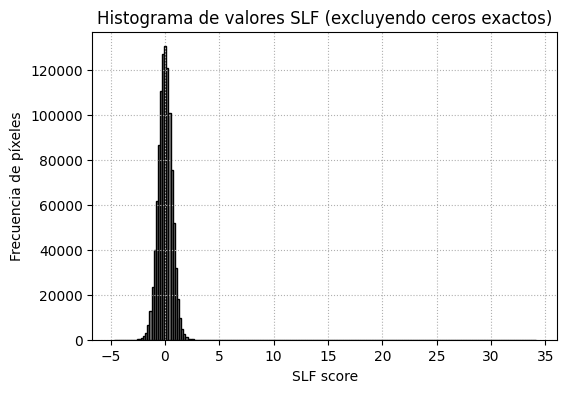

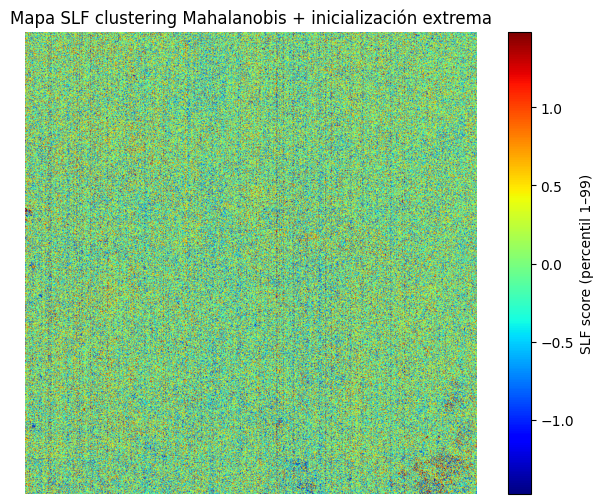

/tmp/ipykernel_654/1676998480.py:199: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_sint = float(diff_sint.T @ covinv_k @ t_vec)
/tmp/ipykernel_654/1676998480.py:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den_sint = float(t_vec.T @ covinv_k @ t_vec)
/tmp/ipykernel_654/1676998480.py:204: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_fondo = float(diff_fondo.T @ covinv_k @ t_vec)



SLF fondo original (cluster 5 ): 1.1187014886245616
SLF pixel sintético (cluster 5 ): 1.2187014886245635

PCA: retenemos 99.85% de varianza con p=10 (clustering PCA)


/tmp/ipykernel_654/1676998480.py:260: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num  = float(diff.T @ covs_inv_pca[k] @ t_vec)
/tmp/ipykernel_654/1676998480.py:261: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  den_k = float(t_vec.T @ covs_inv_pca[k] @ t_vec)



Contraste SLF (Mahalanobis) = 2.9537
Contraste SLF (PCA)         = 2.9531


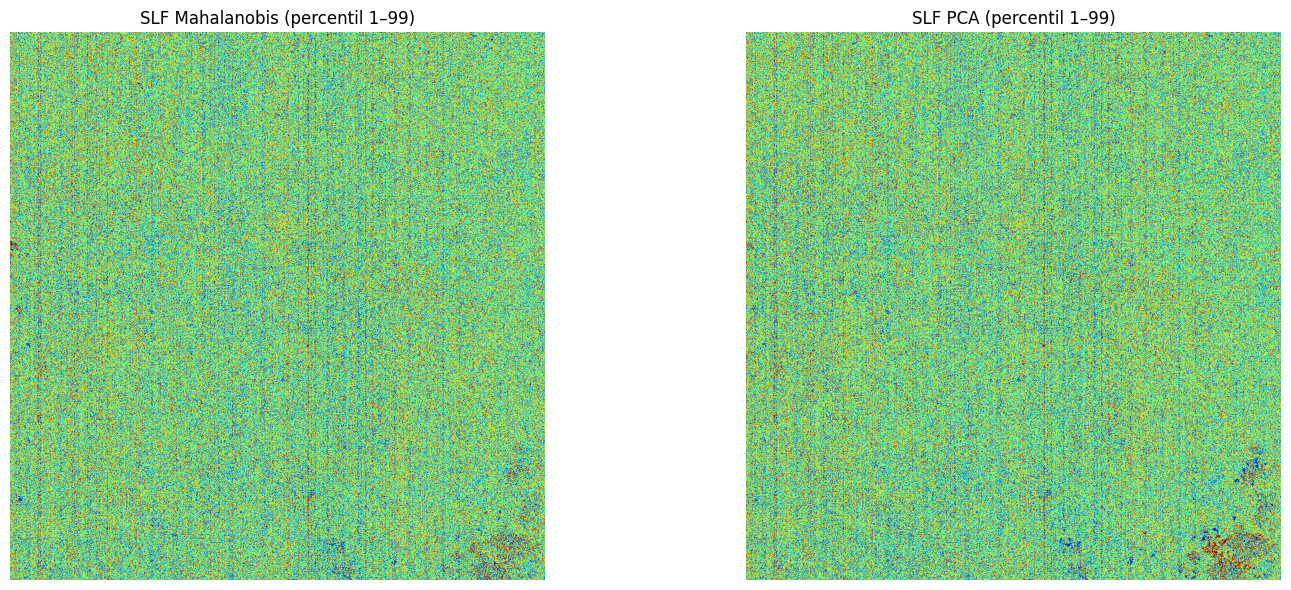

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

# -------------------------------------------------------------------------
# PASO A: CARGAR DATOS DE IMAGEN SWIR Y FIRMA NORMALIZADA
# -------------------------------------------------------------------------
# data   → 3D array (R x C x B), B = 133 bandas
# hdr['wavelength'] → array de 133 longitudes de onda (nm)

# 1) Leer firma H₂O ya filtrada (λ en nm + atenuación normalizada)
firma = np.loadtxt('/home/jleon13/Documents/Proyecto_5/H2O_atenuation_filtered.txt')  # shape = (N_f, 2)
w_firma_orig = firma[:, 0]     # columnas originales de la firma (en nm)
a_firma_orig = firma[:, 1]     # atenuación normalizada (dim N_f)

# 2) Leer longitudes del header y datos de imagen
wavelengths_img = np.array([float(w) for w in hdr['wavelength']])  # vector (133,)

# 3) Interpolar la atenuación de la firma a las longitudes de onda de la imagen SWIR
a_firma_interp = np.interp(wavelengths_img, w_firma_orig, a_firma_orig)
#    Ahora a_firma_interp tiene longitud 133, alineada con wavelengths_img.

# 4) Firma como vector columna (133 × 1) ya alineado
t_vec = a_firma_interp.reshape(-1, 1)  # shape = (133, 1)

# -------------------------------------------------------------------------
# PASO B: PREPARAR PÍXELES E INFORMACIÓN GLOBAL
# -------------------------------------------------------------------------
R, C, B = data.shape
pixels = data.reshape(-1, B)  # (R*C, 133)

# Media global del fondo
mu_global = np.mean(pixels, axis=0).reshape(-1, 1)  # (133, 1)

# Covarianza global del fondo
cov_global = np.cov(pixels, rowvar=False)            # (133, 133)
# Pseudoinversa para detectar el cluster del píxel sintético
cov_global_inv = np.linalg.pinv(cov_global)

# -------------------------------------------------------------------------
# PASO C: CLUSTERING EN ESPACIO MAHALANOBIS + INICIALIZACIÓN “EXTREMA”
# -------------------------------------------------------------------------
n_clusters = 10  # número de clusters, reducir para evitar clusters muy pequeños

# 1) Preparar “whitening” global para Mahalanobis
eigvals, eigvecs = np.linalg.eigh(cov_global)
eps_eig = 1e-6
eigvals_clipped = np.maximum(eigvals, eps_eig)
cov_global_inv_sqrt = eigvecs @ np.diag(1.0 / np.sqrt(eigvals_clipped)) @ eigvecs.T  # (133,133)

# 2) Whiten de los píxeles: (x - μ) · Σ^{-1/2}
pixels_centered = pixels - mu_global.ravel()          # (N, 133)
pixels_whitened = pixels_centered @ cov_global_inv_sqrt  # (N, 133)
N = pixels_whitened.shape[0]

# 3) Inicialización extrema basada en PC1 de pixels_whitened
pca_init = PCA(n_components=1, random_state=0)
pc1_scores = pca_init.fit_transform(pixels_whitened).ravel()  # (N,)
sorted_idx = np.argsort(pc1_scores)
positions = (np.linspace(0, N - 1, n_clusters)).astype(int)
init_centroids = pixels_whitened[sorted_idx[positions]]       # (n_clusters, 133)

# 4) Ejecutar KMeans con init personalizado ("extremo" + Mahalanobis)
kmeans = KMeans(
    n_clusters=n_clusters,
    init=init_centroids,
    n_init=1,            # ya usamos init personalizado
    max_iter=300,
    random_state=0
)
labels = kmeans.fit_predict(pixels_whitened)  # (N,)
labels_img = labels.reshape(R, C)             # (R, C)

# Chequear tamaños de cluster
counts = Counter(labels)
print("Tamaños de cada cluster inicial:")
for k in range(n_clusters):
    marcado = " ⚠️ PEQUEÑO" if counts[k] < B else ""
    print(f"  Cluster {k:02d}: {counts[k]} píxeles{marcado}")

# -------------------------------------------------------------------------
# PASO D: REDUCIR O REASIGNAR CLUSTERS DEMASIADO PEQUEÑOS
# -------------------------------------------------------------------------
small_labels = [k for k, n_k in counts.items() if n_k < B]
if small_labels:
    print("\nClusters pequeños detectados:", small_labels)
    # Reasignamos cada pixel de esos clusters al cluster más poblado restante
    for k_small in small_labels:
        idx_small = np.where(labels == k_small)[0]  # índices lineales
        # Elegimos el cluster más poblado que no sea k_small
        k_target = max(((k, n) for k, n in counts.items() if k != k_small),
                       key=lambda x: x[1])[0]
        labels[idx_small] = k_target
    # Recalcular conteos tras reasignar
    counts = Counter(labels)
    print("Tamaños de cluster tras reasignar pequeños:")
    for k in range(n_clusters):
        marcado = " ⚠️ PEQUEÑO" if counts[k] < B else ""
        print(f"  Cluster {k:02d}: {counts[k]} píxeles{marcado}")
    labels_img = labels.reshape(R, C)

# -------------------------------------------------------------------------
# PASO E: CALCULAR MEDIAS Y COVARIANZAS REGULARIZADAS POR CLUSTER
# -------------------------------------------------------------------------
means = []
covs_inv = []
base_epsilon = 1e-3  # epsilon inicial para regularización

for k in range(n_clusters):
    idx_k = (labels == k)
    pixels_k = pixels[idx_k]  # (n_k, 133)
    n_k = pixels_k.shape[0]
    if n_k < B:
        print(f"⚠️  Cluster {k} aún pequeño (n={n_k} < B={B}). Intentaremos regularizar más.")

    # Media de cluster k
    mean_k = np.mean(pixels_k, axis=0).reshape(-1, 1)  # (133, 1)

    # Covarianza de cluster k
    cov_k = np.cov(pixels_k, rowvar=False)  # (133, 133)

    # Intentaremos encontrar un epsilon que haga converger la SVD en pinv
    epsilon_reg = base_epsilon
    while True:
        try:
            cov_k_reg = cov_k + epsilon_reg * np.eye(B)
            cov_k_inv = np.linalg.pinv(cov_k_reg)
            break
        except np.linalg.LinAlgError:
            # Si SVD no converge, multiplicamos epsilon por 10 y volvemos a intentar
            epsilon_reg *= 10
            if epsilon_reg > 1e-1:
                # Si llegamos a un valor excesivamente grande, usamos identidad (caso extremo)
                cov_k_inv = np.eye(B) / epsilon_reg
                print(f"   • Advertencia: cluster {k} muy mal condicionado, se usó fallback de identidad/epsilon={epsilon_reg:.1e}")
                break
            # De lo contrario, reintentar con epsilon aumentado

    means.append(mean_k)
    covs_inv.append(cov_k_inv)

means = np.concatenate(means, axis=1)   # (133, n_clusters)
covs_inv = np.stack(covs_inv, axis=0)   # (n_clusters, 133, 133)

# -------------------------------------------------------------------------
# PASO F: CÁLCULO DEL MATCHED FILTER POR CLUSTER (SLF) Y VISUALIZACIÓN
# -------------------------------------------------------------------------
slf_map_fa = np.zeros((R, C), dtype=np.float32)

for i in range(R):
    for j in range(C):
        k = labels_img[i, j]
        xij = data[i, j, :].reshape(-1, 1)            # (133, 1)
        diff = xij - means[:, [k]]                    # (133, 1)
        num = float(diff.T @ covs_inv[k] @ t_vec)      # escalar
        den_k = float(t_vec.T @ covs_inv[k] @ t_vec)   # escalar
        slf_map_fa[i, j] = 0.0 if np.isclose(den_k, 0.0) else (num / den_k)

# Histograma de valores SLF (excluyendo ceros exactos)
vals = slf_map_fa.flatten()
vals_nonzero = vals[np.abs(vals) > 1e-8]
plt.figure(figsize=(6, 4))
plt.hist(vals_nonzero, bins=200, color='gray', edgecolor='black')
plt.title("Histograma de valores SLF (excluyendo ceros exactos)")
plt.xlabel("SLF score")
plt.ylabel("Frecuencia de píxeles")
plt.grid(True, ls=':')
plt.show()

# Escalado percentil 1–99 para la visualización
vmin, vmax = np.percentile(vals_nonzero, [1, 99])
plt.figure(figsize=(8, 6))
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar(label='SLF score (percentil 1–99)')
plt.title("Mapa SLF clustering Mahalanobis + inicialización extrema")
plt.axis('off')
plt.show()

# -------------------------------------------------------------------------
# PASO G: TEST CON PÍXEL SINTÉTICO PARA VALIDAR SLF
# -------------------------------------------------------------------------
# 1) Seleccionar un píxel de fondo real
pixel00 = data[0, 0, :].reshape(-1, 1)  # (133, 1)

# 2) Inyectar un 10 % de la firma
x_sint = pixel00 + 0.10 * t_vec

# 3) Determinar el cluster de x_sint usando mismo KMeans
xw_sint = ((x_sint.ravel() - mu_global.ravel()) @ cov_global_inv_sqrt).reshape(1, -1)
cluster_sint = kmeans.predict(xw_sint)[0]

# 4) Calcular SLF de x_sint y SLF de pixel00 en ese cluster
mean_k = means[:, cluster_sint].reshape(-1, 1)
covinv_k = covs_inv[cluster_sint]

diff_sint = x_sint - mean_k
num_sint = float(diff_sint.T @ covinv_k @ t_vec)
den_sint = float(t_vec.T @ covinv_k @ t_vec)
slf_sint = 0.0 if np.isclose(den_sint, 0.0) else (num_sint / den_sint)

diff_fondo = pixel00 - mean_k
num_fondo = float(diff_fondo.T @ covinv_k @ t_vec)
den_fondo = den_sint
slf_fondo = 0.0 if np.isclose(den_fondo, 0.0) else (num_fondo / den_fondo)

print("\nSLF fondo original (cluster", cluster_sint, "):", slf_fondo)
print("SLF pixel sintético (cluster", cluster_sint, "):", slf_sint)

# -------------------------------------------------------------------------
# PASO H (OPCIONAL): CLUSTER EN ESPACIO PCA Y COMPARAR CONTRASTES
# -------------------------------------------------------------------------
# 1) PCA a 10 componentes en pixeles originales
pca = PCA(n_components=10, random_state=0)
X_pca10 = pca.fit_transform(pixels)
expl_var = np.sum(pca.explained_variance_ratio_)
print(f"\nPCA: retenemos {expl_var*100:.2f}% de varianza con p=10 (clustering PCA)")

# 2) KMeans sobre espacio PCA
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
labels_pca = kmeans_pca.fit_predict(X_pca10)
labels_img_pca = labels_pca.reshape(R, C)

# 3) Medias y covarianzas regularizadas para clusters PCA
means_pca, covs_inv_pca = [], []
for k in range(n_clusters):
    idx_k = (labels_pca == k)
    pix_k = pixels[idx_k]
    mu_k = np.mean(pix_k, axis=0).reshape(-1, 1)
    cov_k = np.cov(pix_k, rowvar=False)

    # Regularización con mismo esquema adaptativo
    epsilon_reg = base_epsilon
    while True:
        try:
            cov_k_reg = cov_k + epsilon_reg * np.eye(B)
            covs_inv_pca_k = np.linalg.pinv(cov_k_reg)
            break
        except np.linalg.LinAlgError:
            epsilon_reg *= 10
            if epsilon_reg > 1e-1:
                covs_inv_pca_k = np.eye(B) / epsilon_reg
                print(f"   • Fallback PCA: cluster {k} mal condicionado, ε={epsilon_reg:.1e}")
                break

    means_pca.append(mu_k)
    covs_inv_pca.append(covs_inv_pca_k)

means_pca = np.concatenate(means_pca, axis=1)      # (133, n_clusters)
covs_inv_pca = np.stack(covs_inv_pca, axis=0)      # (n_clusters, 133, 133)

# 4) SLF por cluster PCA
slf_map_pca = np.zeros((R, C), dtype=np.float32)
for i in range(R):
    for j in range(C):
        k = labels_img_pca[i, j]
        xij = data[i, j, :].reshape(-1, 1)
        diff = xij - means_pca[:, [k]]
        num  = float(diff.T @ covs_inv_pca[k] @ t_vec)
        den_k = float(t_vec.T @ covs_inv_pca[k] @ t_vec)
        slf_map_pca[i, j] = 0.0 if np.isclose(den_k, 0.0) else (num / den_k)

# 5) Medir rango percentil 1–99 de ambos mapas
vals_mah = slf_map_fa.flatten()
vals_pca = slf_map_pca.flatten()
contraste_mah = np.percentile(vals_mah, 99) - np.percentile(vals_mah, 1)
contraste_pca = np.percentile(vals_pca, 99) - np.percentile(vals_pca, 1)
print(f"\nContraste SLF (Mahalanobis) = {contraste_mah:.4f}")
print(f"Contraste SLF (PCA)         = {contraste_pca:.4f}")

# 6) Visualización comparativa de SLF PCA y Mahalanobis (percentil 1–99)
vmin_pca, vmax_pca = np.percentile(vals_pca[np.abs(vals_pca) > 1e-8], [1, 99])
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(slf_map_fa, cmap='jet', vmin=vmin, vmax=vmax)
plt.title('SLF Mahalanobis (percentil 1–99)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(slf_map_pca, cmap='jet', vmin=vmin_pca, vmax=vmax_pca)
plt.title('SLF PCA (percentil 1–99)')
plt.axis('off')

plt.tight_layout()
plt.show()
